In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Задані точки
x = np.array([0.6,0.8,1.1,1.6,2.0])
y = np.array([1.76,2.61,3.89,2.18,4.35])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)

for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i + 1] - a[i]) - (3 / h[i - 1]) * (a[i] - a[i - 1])

l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)

for i in range(1, n):
    l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * mu[i - 1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

# Виправлення обчислення коефіцієнтів для останнього відрізка
c[n - 1] = (alpha[n - 1] - h[n - 2] * z[n - 2]) / (2 * (h[n - 2] + mu[n - 1]))
b[n - 1] = (a[n] - a[n - 1]) / h[n - 1] - h[n - 1] * (2 * c[n - 1] + c[n - 2]) / 3
d[n - 1] = (c[n - 1] - c[n - 2]) / (3 * h[n - 1])

for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j + 1]
    b[j] = (a[j + 1] - a[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
    d[j] = (c[j + 1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайна для кожного відрізка
for i in range(n):
    print(f"Відрізок {i + 1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3")


Відрізок 1:
S_0(x) = 1.76 + 3.7891(x - 0.6) + 0.0(x - 0.6)^2 + 11.5229(x - 0.6)^3
Відрізок 2:
S_1(x) = 2.61 + 5.1718(x - 0.8) + 6.9137(x - 0.8)^2 + -33.1032(x - 0.8)^3
Відрізок 3:
S_2(x) = 3.89 + 0.3822(x - 1.1) + -22.8791(x - 1.1)^2 + 30.5494(x - 1.1)^3
Відрізок 4:
S_3(x) = 2.18 + -0.6937(x - 1.6) + 22.945(x - 1.6)^2 + 19.1208(x - 1.6)^3


Значення сплайна:
x = 0.60, y = 1.760
x = 0.61, y = 1.790
x = 0.63, y = 1.827
x = 0.64, y = 1.869
x = 0.66, y = 1.917
x = 0.67, y = 1.969
x = 0.68, y = 2.026
x = 0.70, y = 2.087
x = 0.71, y = 2.152
x = 0.73, y = 2.220
x = 0.74, y = 2.292
x = 0.76, y = 2.366
x = 0.77, y = 2.442
x = 0.78, y = 2.519
x = 0.80, y = 2.599
x = 0.81, y = 2.679
x = 0.83, y = 2.760
x = 0.84, y = 2.841
x = 0.85, y = 2.921
x = 0.87, y = 3.002
x = 0.88, y = 3.081
x = 0.90, y = 3.159
x = 0.91, y = 3.235
x = 0.93, y = 3.309
x = 0.94, y = 3.381
x = 0.95, y = 3.449
x = 0.97, y = 3.514
x = 0.98, y = 3.576
x = 1.00, y = 3.633
x = 1.01, y = 3.686
x = 1.02, y = 3.734
x = 1.04, y = 3.776
x = 1.05, y = 3.813
x = 1.07, y = 3.844
x = 1.08, y = 3.868
x = 1.09, y = 3.886
x = 1.11, y = 3.896
x = 1.12, y = 3.899
x = 1.14, y = 3.895
x = 1.15, y = 3.884
x = 1.17, y = 3.868
x = 1.18, y = 3.845
x = 1.19, y = 3.817
x = 1.21, y = 3.784
x = 1.22, y = 3.746
x = 1.24, y = 3.704
x = 1.25, y = 3.658
x = 1.26, y = 3.608
x = 1.28, y = 3.554
x 

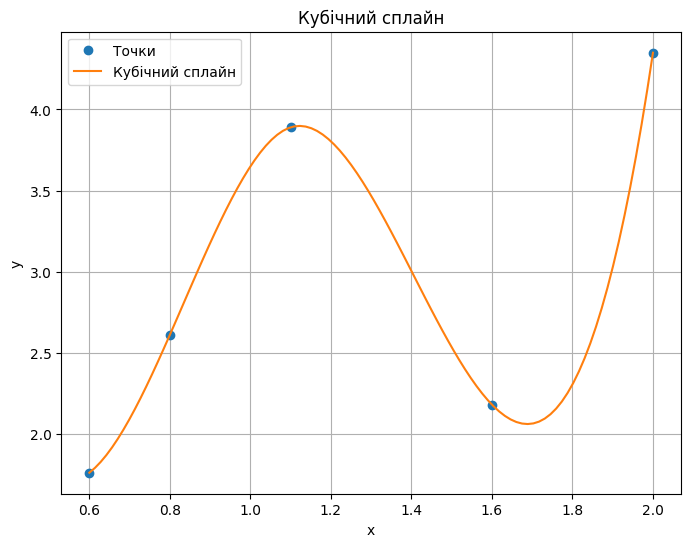

In [2]:
# Побудова кубічного сплайна
cs = CubicSpline(x, y)
# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)
# Роздрукуйте значення сплайна
print("Значення сплайна:")
for i in range(len(x_new)):
 print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")
# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()